In [1]:
from utils.data_handling import *
from utils.sensor_optimisation_gpy_sparse import *
from parameters import *
import GPy

import matplotlib.pyplot as plt
GPy.plotting.change_plotting_library('matplotlib')

In [2]:
parameters['i_end'] = 100
parameters

{'i_start': 0,
 'i_end': 100,
 'crop': None,
 'field_name': 'TracerBackground',
 'cov_method': 'sample'}

In [3]:
loaded = initial_load_data(parameters, recompute=False)
ref_vtu, data_df, loc_df, time_df = loaded

  0%|          | 0/1 [00:00<?, ?it/s]

### Loading files from original VTU
==> Import vtu files from 0 to 0


100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


Number of Locations after cropping :  100040
==> Loading from : ../data/temp_data/cache_0_100_None/loc_TracerBackground.pkl
==> Loading from : ../data/temp_data/cache_0_100_None/time_TracerBackground.pkl
==> Loading from : ../data/temp_data/cache_0_100_None/data_TracerBackground.pkl


In [4]:
# Select slice of Data for 2D GP : 
I = idx_slice(loc_df, direction='Z', s_min=1, s_max=1.5)


In [5]:
# Data for the regression
dim = 3
t = 100
X = loc_df.values[I,:dim]
Y = data_df.values[I,t].reshape(-1,1)
X.shape

(4355, 3)

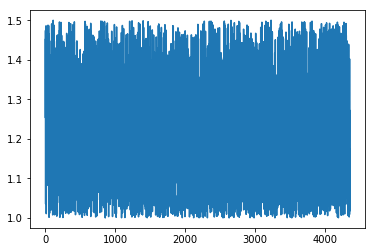

In [6]:
plt.plot(loc_df.values[I,2])

In [9]:
kernel = GPy.kern.Matern52(dim,ARD=True) + GPy.kern.White(dim)
m = GPy.models.GPRegression(X,Y,kernel)
m.likelihood.variance = 0.01


In [31]:
m_i = m.copy()

In [36]:
k = m_i.kern

sum.,value,constraints,priors
Mat52.variance,0.19561788485787648,+ve,
Mat52.lengthscale,"(3,)",+ve,
white.variance,6.685121695784637e-10,+ve,


In [12]:
m.optimize(messages=True,max_f_eval = 1000000)


In [14]:
m.sum.Mat52.lengthscale

index,GP_regression.sum.Mat52.lengthscale,constraints,priors
[0],15.71098343,+ve,
[1],16.78947359,+ve,
[2],9.27040064,+ve,


In [16]:
m.plot_inducing(visible_dims=[0,1],projection='2d')

AttributeError: 'GPRegression' object has no attribute 'plot_inducing'

{'dataplot': [<matplotlib.collections.PathCollection at 0x11fb7c668>]}

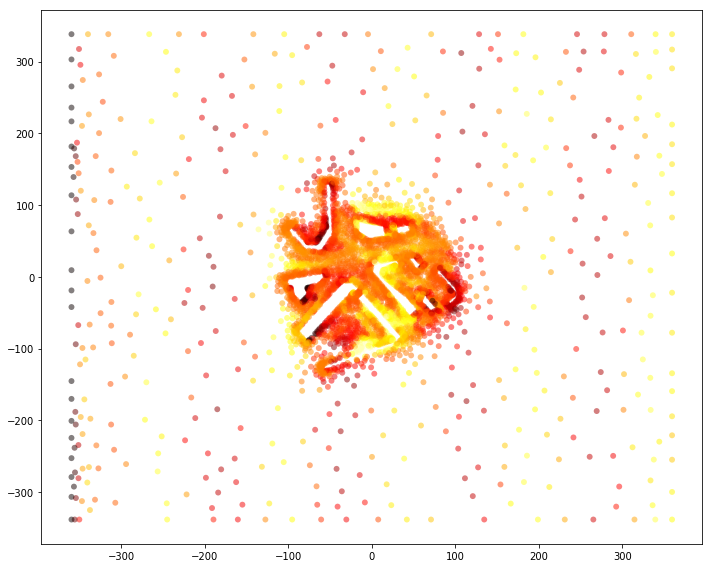

In [27]:
m.plot_data(visible_dims=[0,1],figsize=(10,8))

{'gpmean': [<matplotlib.contour.QuadContourSet at 0x120f08438>]}

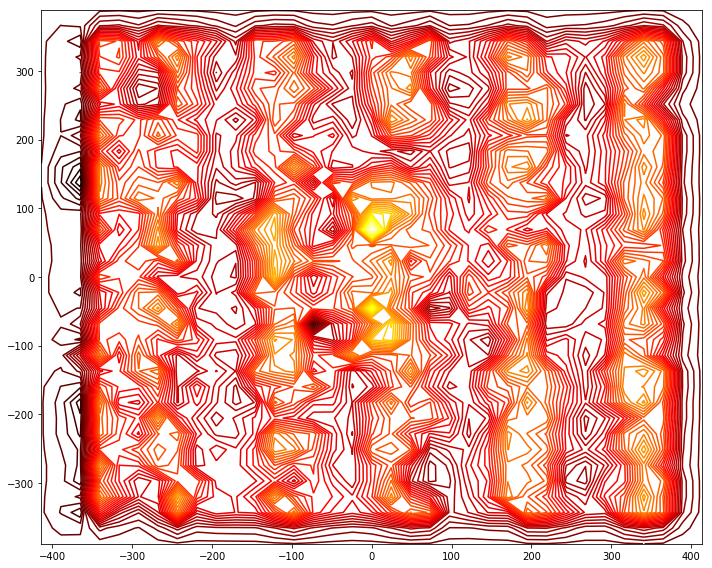

In [30]:
m.plot_mean(visible_dims=[0,1],figsize=(10,8),levels=50)

RuntimeError: Can only plot density in one input dimension

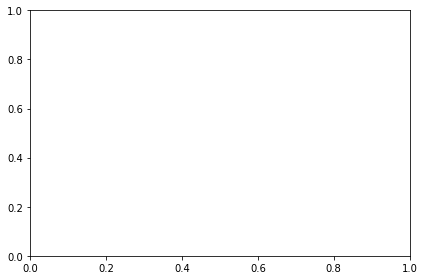

In [26]:
m.plot_density(visible_dims=[0,1])